<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week10%20-%20Classification/exercises/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Logistic Regression 

In this lab we will explore logistic regression which is a well known method for classification problems. We will work with a hearth disease data-set, and we will try to predict whether the patient has a heart disease or not.



![Heart](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/how_heart_disease_affects_your_body_slideshow/493ss_thinkstock_rf_heart_anatomy_illustration.jpg)


In [ ]:
#Load the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

In [ ]:
np.random.seed = 72

### Load data

We will start with the hear disease data-set. Here's a description of the attributes in the data-set:

1. `age`
2. `sex`
3. `cp`: chest pain type (4 values)
4. `trestbps`: resting blood pressure
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: fasting blood sugar > 120 mg/dl
7. `restecg`: resting electrocardiographic results (values 0,1,2)
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina
10. `target`: presence of heart disease (1), absence of heart disease(0)

![ECG](https://media.eurekalert.org/multimedia_prod/pub/web/230705_web.jpg)


In [ ]:
# data-set: heart.csv
df = pd.read_csv("https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,M,D,145,233,yes,A,150,no,1
1,37,M,C,130,250,no,B,187,no,1
2,41,F,B,130,204,no,A,172,no,1
3,56,M,B,120,236,no,B,178,no,1
4,57,F,A,120,354,no,B,163,yes,1


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

### Simple Logistic Regression

Let's start with only 2 features: age and maximum heart rate achieved (`talach`). Define your features and target variable. 

In [ ]:
X = df[["age", "thalach"]]
y = df["target"]

Split your data set into train and test subsets. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

#### Standardizing

When you do standardization (or any other modification) to the training data, you have to apply the same modifications to the test data as well. Otherwise your test accuracy would be non-sense.

Here we apply the same standardisation to test data, which means that we normalize the test data with mean and standard deviation from the train data.

Use *StandardScaler()* for normalization. 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Apply the standardization to your train and test set. 

In [ ]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Define your model. Try to use a logistic regression with cross validation (cv = 10). 

In [ ]:
# logistic regression with 5 fold cross validation
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=10, max_iter=100)

Fit your model now using the train set. 

In [ ]:
LR_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Compare your train and test accuracy for your model.

In [ ]:
# train accuracy with CV
LR_cv.score(X_train,y_train)

0.6886792452830188

In [ ]:
# test accuracy with CV
LR_cv.score(X_test, y_test)

0.7142857142857143

Have a look at the class distribution.

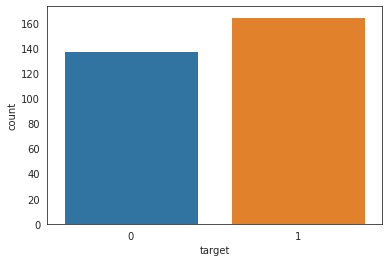

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(y)
plot = plt.show()

Compute the baserate.

$$Base rate = \frac{Most\_frequent\_class}{Total\_observations}$$

In [ ]:
#Compute the base rate

nbr_heart_disease = df[df["target"] == 1].shape[0]
print("Heart disease = ", nbr_heart_disease)

nbr_no_heart_disease = df[df["target"] == 0].shape[0]
print("No heart disease = ", nbr_no_heart_disease)

print("Baserate = ", max(nbr_heart_disease, nbr_no_heart_disease)/(nbr_heart_disease+ nbr_no_heart_disease))

Heart disease =  165
No heart disease =  138
Baserate =  0.5445544554455446


Use the confusion_matrix module to show the confusion matrix.

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train, LR_cv.predict(X_train))
print(cf)

[[61 39]
 [27 85]]


Plot the confusion matrix.

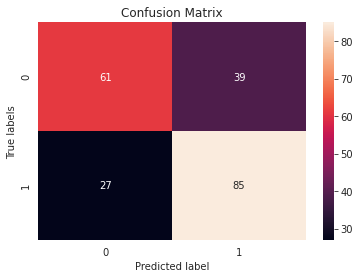

In [ ]:
ax = plt.subplot()
r = sns.heatmap(cf, annot = True, fmt = 'g', ax = ax)

ax.set_xlabel('Predicted label')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
w =ax.yaxis.set_ticklabels(['0', '1'])



### Decision boundary

As we used only two features for classification, we can observe the linear decision boundary made by the logistic regression in a 2D plot. You can also observe the mis-classified training points in this plot. Let's plot the decision boundary for the model with cross validation. 

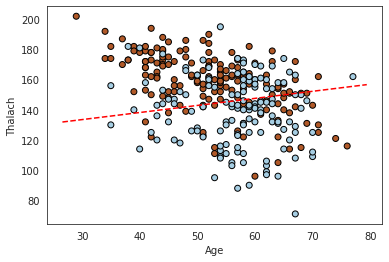

In [ ]:
#Decision boundaries

model = LogisticRegression()
model.fit(X, y)


plt.scatter(X['age'], X['thalach'], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = (-x_vals * model.coef_[0][0] - model.intercept_[0])/model.coef_[0][1]
plt.plot(x_vals, y_vals, '--', c="red")

plt.xlabel('Age')
plt.ylabel('Thalach')


plt.xticks()
plt.yticks()

plt.show()

Try to predict the class and probability of correct classification for Age = 50, Thalach = 130 and Age = 70, Thalach = 160

In [ ]:
print(model.predict([[50,130],[70,160]]))
print(model.predict_proba([[50,130],[70,160]]))

[0 1]
[[0.62982786 0.37017214]
 [0.42091442 0.57908558]]


Now let's try more numerical features and see if the accuracy improuves.
We will use now "age", "thalach", "trestbps" and "chol". 
Define your features and your target variable. 

In [ ]:
X = df[["age", "thalach", "trestbps", "chol"]]
y = df["target"]

Split your data set into train and test subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

Standardize your data. 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#Apply normalization
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Fit your model using the train data. Let's use the logistic regression with cross validation here. 

In [ ]:
LR_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Compare your train and test accurary. 

In [ ]:
# train accuracy
LR_cv.score(X_train,y_train)

0.7024793388429752

In [ ]:
# test accuracy
LR_cv.score(X_test, y_test)

0.7704918032786885

Finally, show the confusion matrix.

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_cv.predict(X_train))

array([[73, 42],
       [30, 97]])